___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Filtros da base de dados

In [67]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [68]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo\Desktop\insper\cd new


In [69]:
#Se usar o arquivo descompactado
dados = pd.read_csv('PES2015.csv',sep=',')
pd.options.mode.chained_assignment = None 
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

V9891,Até 9 anos,10 a 14 anos,14 a 17 anos,a,b,c,d
UF,,,,,,,
Norte,1.45526,5.24548,3.89088,2.53738,1.29844,0.24523,0.13290
Nordeste,2.70532,9.20587,6.86533,4.83176,2.71866,0.53550,0.24579
Suldeste,2.18316,9.56120,9.78530,5.86662,2.49846,0.42818,0.21465
Sul,1.48695,5.88553,5.44734,2.39503,1.04487,0.20408,0.11455
Centro-Oeste,1.19724,3.79690,3.28920,1.69214,0.77350,0.15292,0.06840


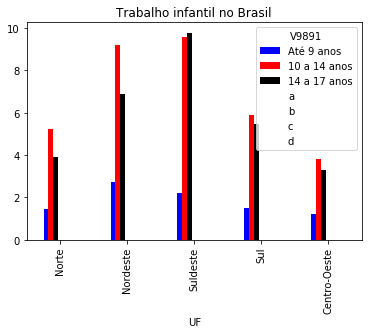

In [70]:
pd.to_numeric(dados.UF)
dados.UF[(dados.UF>=11) & (dados.UF<=17)] = [10]
dados.UF[(dados.UF>=21) & (dados.UF<=29)] = [20]
dados.UF[(dados.UF>=31) & (dados.UF<=35)] = [30]
dados.UF[(dados.UF>=41) & (dados.UF<=43)] = [40]
dados.UF[(dados.UF>=50) & (dados.UF<=53)] = [50]

pd.to_numeric(dados.V9891)
dados.V9891[dados.V9891==1] = [10]
dados.V9891[dados.V9891==2] = [20]
dados.V9891[dados.V9891==3] = [30]
dados.V9891[dados.V9891==4] = [40]
dados.V9891[dados.V9891==5] = [50]
dados.V9891[dados.V9891==6] = [60]
dados.V9891[dados.V9891==7] = [70]


dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('Norte','Nordeste','Suldeste','Sul','Centro-Oeste')

dados.V9891 = dados.V9891.astype('category')
dados.V9891.cat.categories = ('Até 9 anos','10 a 14 anos','14 a 17 anos','a','b','c','d')

ct = pd.crosstab([dados.UF],[dados.V9891], normalize = True)
ct.dropna()
soma = ct.sum().sum()
ct*100/soma
ct = (ct/ct.sum().sum()*100).round(decimals=5)
ct.plot(kind = 'bar', color = ('blue','red','black','white','white','white','white'))
plt.title('Trabalho infantil no Brasil')
#plt.ylabel('quantidade de pessoas em milhares')
ct

In [76]:
dr = pd.crosstab([dados.UF],[dados.V4707],normalize = True)
dr.dropna()
dr


V4707,1.0,2.0,3.0,4.0,5.0
UF,,,,,
Norte,0.009819,0.041358,0.065808,0.017095,0.015321
Nordeste,0.022126,0.074010,0.113982,0.030837,0.026212
Suldeste,0.017561,0.057872,0.150212,0.041182,0.037750
Sul,0.008729,0.030056,0.090851,0.015891,0.022446
Centro-Oeste,0.006193,0.021466,0.057121,0.013239,0.012864


___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!